#  Mass balance in multi-pass welding

##### Kindly note:
##### Please run the cells in the order that they appear
##### Please use the improved model for performing computations

In [191]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d     # for visualizing in 3 dimensions

In [192]:
import matplotlib.pyplot as plt
import pandas as pd

# MATHEMATICAL MODELING OF A SINGLE WELD BEAD

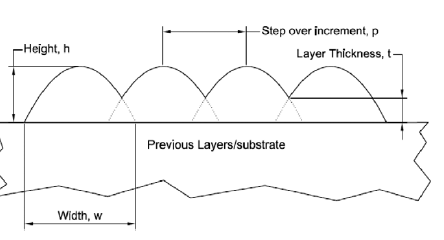

###                                                                         The shape of weld bead is parabolic :

# 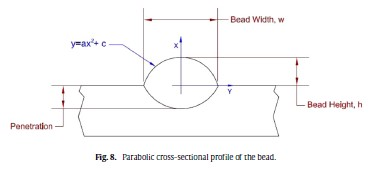

### The equation of the parabola is obtained using the boundary conditions : 
###  y=h at x=0
###                                                                                                                               y= 0 ar x=w/2
###                                                                                                                               y=0 at x=-w/2

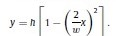

In [193]:
w = 2                           # width of the weld bead

In [194]:
h = 1                           # height of the weld bead    

In [195]:
t = 0.2                         # thickness of the weld bead

# Improved Model

## Importing x-y corrdinates from a csv file and calculating the height of the weld bead

In [196]:
df = pd.read_csv('C:/Users/Venkatesh/Downloads/Copy_of_Book1(5842).csv')     # note : '.csv' extension is required to open the
                                                                             #         file

In [197]:
x = df.X

In [198]:
y = df.Y

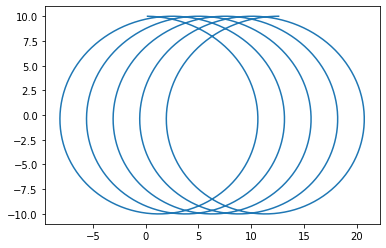

In [199]:
plt.plot(x,y)

In [200]:
x.shape

(1800,)

In [201]:
z = np.zeros((1800))           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                                 # in this case, 1800

length = 0
    

for i in range(1799):                                    # iterate over each sample point except the last as we want to access
                                                         # the (i+1)th element of x and y coordinates.
        
    if(length>w):                                        # we ensure that the length trsversed on the 2d curve is 
                                                         # not greater than the width for a single bead
        length = 0                                       
        
    if(length<=w):                                       

        
          length = length +  np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)     # length traversed along the path can be
                                                                            # approximated as the distance between
                                                                            # two consecutive coordinates along the 2d curve
        
          z[i] = np.multiply(4*h/w**2, w*length - length**2) + t            # shifting the equation of parabola obtained earlier
                                                                            # to the right by a distance of width/2 and 
          if(z[i]<0):
            z[i] = 0                                                           # adding the thickness 't' in the expression of 
                                                                            # height to simplify calculations
        
        
z[i+1] = z[i]                                                               # assigning the value corresponding to the final
                                                                            # x and y coordinates


### Plotting z vs x 

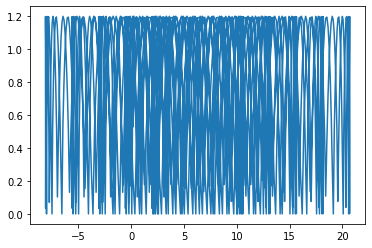

In [202]:
plt.plot(x,z)

### Plotting z vs y

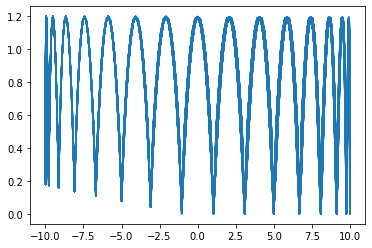

In [203]:
plt.plot(y,z)

### Plotting x,y,z in 3d coordinates

Text(0.5, 0.92, 'simple 3D scatter plot')

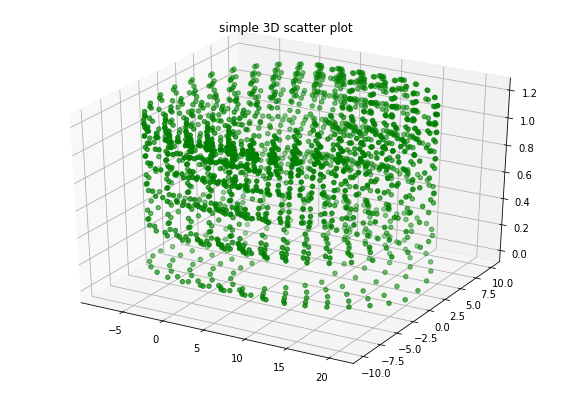

In [204]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

### Note: We do not obtain a smooth plot as there are less number of data points and we have generated a scatter plot here. A smooth curve is obtained if we have a large number of data points

# Mass balance for some more curves

# In 2d plane : y = exp(x)

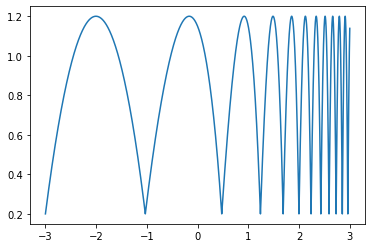

In [205]:
x = np.arange(-3,3, 0.00001)    # generate 200000 data points uniformly sampled between -1 and 1, (the interval can be changed)

y = np.exp(x)

# initialize x0 and y0

#x0 = x[0]
#y0 = y[0]

z = np.zeros((600000))           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                                 # in this case, 200000

length = 0
    

for i in range(599999):                                    # iterate over each sample point
    if(length<=w):         
        
        length = length + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
        
        z[i] = np.multiply(4*h/w**2, w*length - length**2) + t
    
    if(length>w):
        length = 0
        
        
z[i+1] = z[i]
plt.plot(x,z)

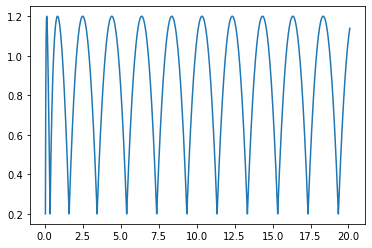

In [206]:
plt.plot(y,z)

Text(0.5, 0.92, 'simple 3D scatter plot')

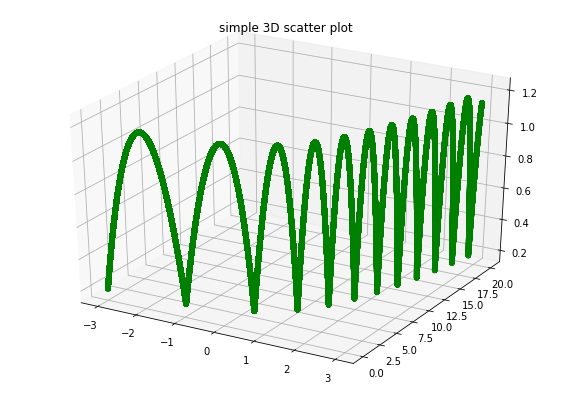

In [207]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# In 2d plane, y=sin(x), with interval (-3,3)

In [209]:
x = np.arange(-3,3, 0.00001)  
x.shape

(600000,)

In [210]:
x = np.arange(-3,3, 0.00001)    # generate 600000 data points uniformly sampled between -1 and 1, (the interval can be changed)

y = np.sin(x)                   # setting y as a function of x

# initialize x0 and y0

#x0 = x[0]
#y0 = y[0]

z = np.zeros((600000))           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                                 # in this case, 600000

length = 0
    

for i in range(599999):                                    # iterate over each sample point
    
    
    if(length>w):
        length = 0
    
    if(length<=w):         
        
        length = length + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
        
        z[i] = np.multiply(4*h/w**2, w*length - length**2) + t
    
        
        
z[i+1] = z[i]

### Plotting y vs x 

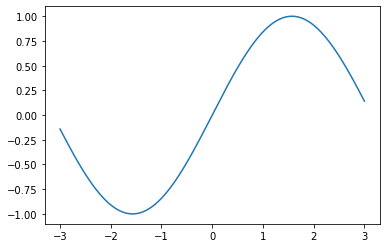

In [211]:
plt.plot(x,y)

### Plotting  z vs x

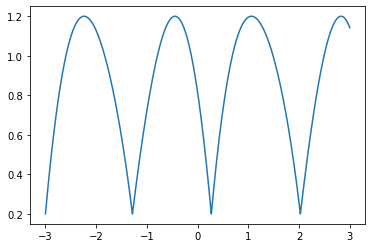

In [212]:
plt.plot(x,z)

### Plotting z vs y

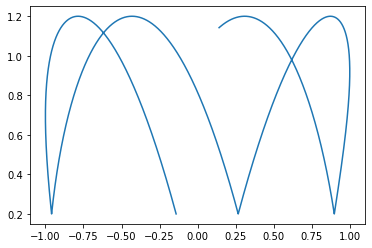

In [213]:
plt.plot(y,z)

### Note: If we draw a line y=constant in the graph of sin(x), the line will intersect sin(x) at two points in the given interval. Hence, we obtain two corresponding values of z for those values of y

Text(0.5, 0.92, 'simple 3D scatter plot')

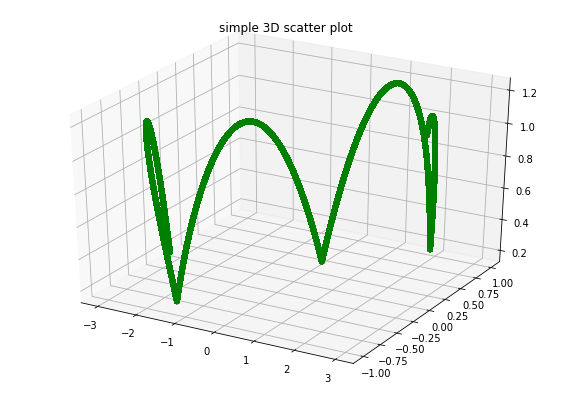

In [214]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# In 2d plane, y=x

In [215]:
x = np.arange(-1,1, 0.00001)    # generate 200000 data points uniformly sampled between -1 and 1, (the interval can be changed)

y = x                   # setting y as a function of x

# initialize x0 and y0

#x0 = x[0]
#y0 = y[0]

z = np.zeros((200000))           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                                 # in this case, 200000

length = 0
    

for i in range(199999):                                    # iterate over each sample point
    if(length<=w):         
        
        length = length + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
        
        z[i] = np.multiply(4*h/w**2, w*length - length**2) + t
    
    if(length<=w and length>w-0.001):
        length = 0
        
        
z[i+1] = z[i]

### Plotting z vs x  

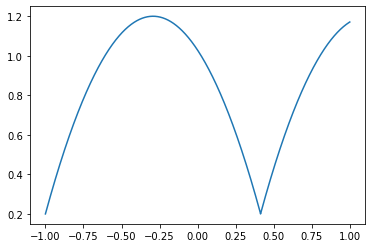

In [216]:
plt.plot(x,z)

### Plotting z vs y

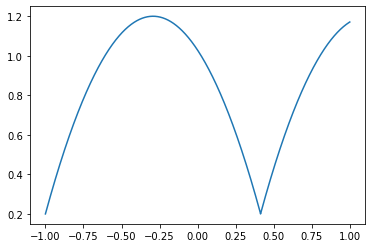

In [217]:
plt.plot(y,z)

### Plotting x,y,z in 3d coordinates

Text(0.5, 0.92, 'simple 3D scatter plot')

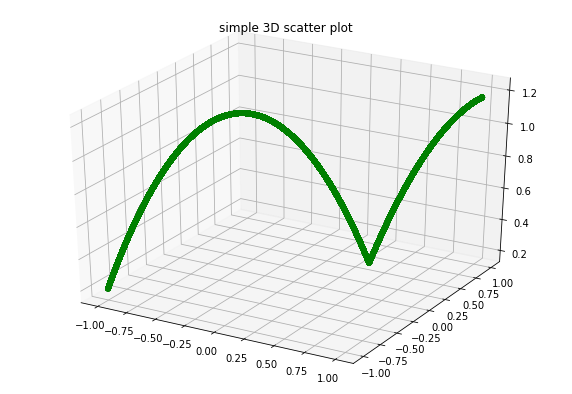

In [218]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# In xy plane, y=x^2

In [219]:
x = np.arange(-5,5, 0.00001) 
x.shape

(1000000,)

In [220]:
x = np.arange(-5,5, 0.00001)    # generate 1000000 data points uniformly sampled between -1 and 1, (the interval can be changed)

y = x**2                   # setting y as a function of x

# initialize x0 and y0

#x0 = x[0]
#y0 = y[0]

z = np.zeros((1000000))           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                                 # in this case, 200000

length = 0
    

for i in range(999999):                                    # iterate over each sample point
    
    if(length>w):
        length = 0
    
    if(length<=w):         
        
        length = length + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
        
        z[i] = np.multiply(4*h/w**2, w*length - length**2) + t
    
    
        
        
z[i+1] = z[i]

### Plot y vs x

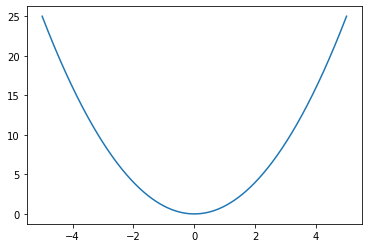

In [221]:
plt.plot(x,y)

### Plot z vs x

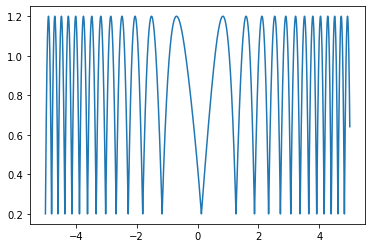

In [222]:
plt.plot(x,z)

### Plot z vs y 

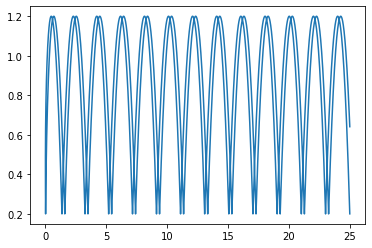

In [223]:
plt.plot(y,z)

Text(0.5, 0.92, 'simple 3D scatter plot')

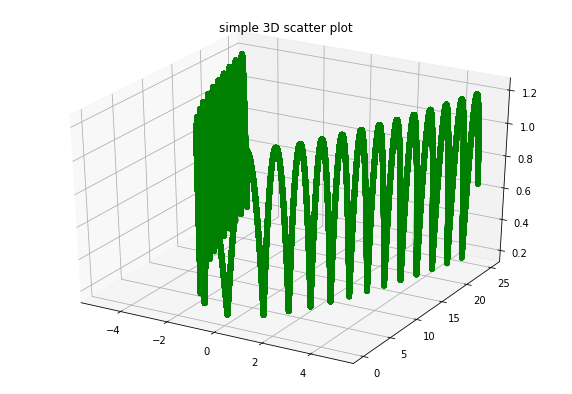

In [224]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# Implementing for any general function y=f(x) 

In [ ]:
x = np.arange( , , )    # specify the start point and the end point of the interval in the first two parameters and the 
                        # increment along the x-direction as the third parameter
y =                    # setting y as a function of x f(x)


# initialize z with zeros of shape = x.shape

z = np.zeros(())           # initialize the z-coordinate with zeros and size equal to the length of x or y, 
                            

length = 0
    

for i in range():                                    # iterate over each sample point except the last sample point (x.shape-1)
    
    
    if(length>w):
        length = 0
    
    if(length<=w):         
        
        length = length + np.sqrt((x[i+1]-x[i])**2 + (y[i+1]-y[i])**2)
        
        z[i] = np.multiply(4*h/w**2, w*length - length**2) + t
    
        
        
z[i+1] = z[i]

### Plot y vs x

In [ ]:
plt.plot(y,x)

### Plot z vs x

In [ ]:
plt.plot(z,x)

### Plot z vs y

In [ ]:
plt.plot(z,y)

### Plot in 3d coordinates

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")